# [AMLD'19 Learning and Processing over Networks](https://github.com/rodrigo-pena/amld2019-graph-workshop)

# 2 Network Science

In this notebook we will examine a couple of basic network properties, taking a flight route graph and a road graph as objects of study. 

It will be useful to check the documentation of the [`networkx`](https://networkx.github.io/documentation/networkx-1.10/index.html) package as we go along, since a lot of the properties we will see can be easily computed via calls to this package.

In [1]:
import numpy as np
import scipy as sp
import osmnx as ox
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import collections
import utils

The data used for constructing the flight route network was taken from [OpenFlights](https://openflights.org/data.html). Each node in the network represents an airport. Edges are drawn between nodes if there is a flight route connecting the corresponding nodes.

The cell code below loads the flight route network that we are going to use. The graph itself, represented as a `networkx` graph, is returned in the variable `flight_graph`. The varible `pos`, useful for plotting the graph against a world map, is a dictionary containing airport acronyms as keys and (longitude, latitude) pairs as values.

In [2]:
routes, airports, pos, flight_graph = utils.preprocess_flight_routes()

The `routes` dataframe contains information on the flight routes, such as source and destination airports, and distance. You can get a glimpse of its contents by running the cell below.

In [3]:
routes.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment,Source latitude,Source longitude,Destination latitude,Destination longitude,Distance
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,43.449902,39.956600,55.606201,49.278702,1507.989717
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,46.283298,48.006302,55.606201,49.278702,1040.943207
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,46.283298,48.006302,44.225101,43.081902,449.036664
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,55.305801,61.503300,55.606201,49.278702,773.126239
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,55.305801,61.503300,55.012600,82.650703,1343.161122


Similarly, the `airports` dataframe contains information on the various airports in the dataset. Recall that they represent the nodes in our first graph.

In [4]:
airports.head()

,Airport ID,Name,City,Country,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TZ,Type,Source
4,,,,,,,,,,,,,
GKA,1,Goroka Airport,Goroka,Papua New Guinea,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
MAG,2,Madang Airport,Madang,Papua New Guinea,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
HGU,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
LAE,4,Nadzab Airport,Nadzab,Papua New Guinea,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
POM,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports


The line of code below allows us to overlay the graph onto the world map. The flight routes graph is an instance of a network with a "natural" embedding (the surface of the earth). Such is not always the case and sometimes we need to come up with our own embeddings, as we will see in the next notebook.

/srv/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


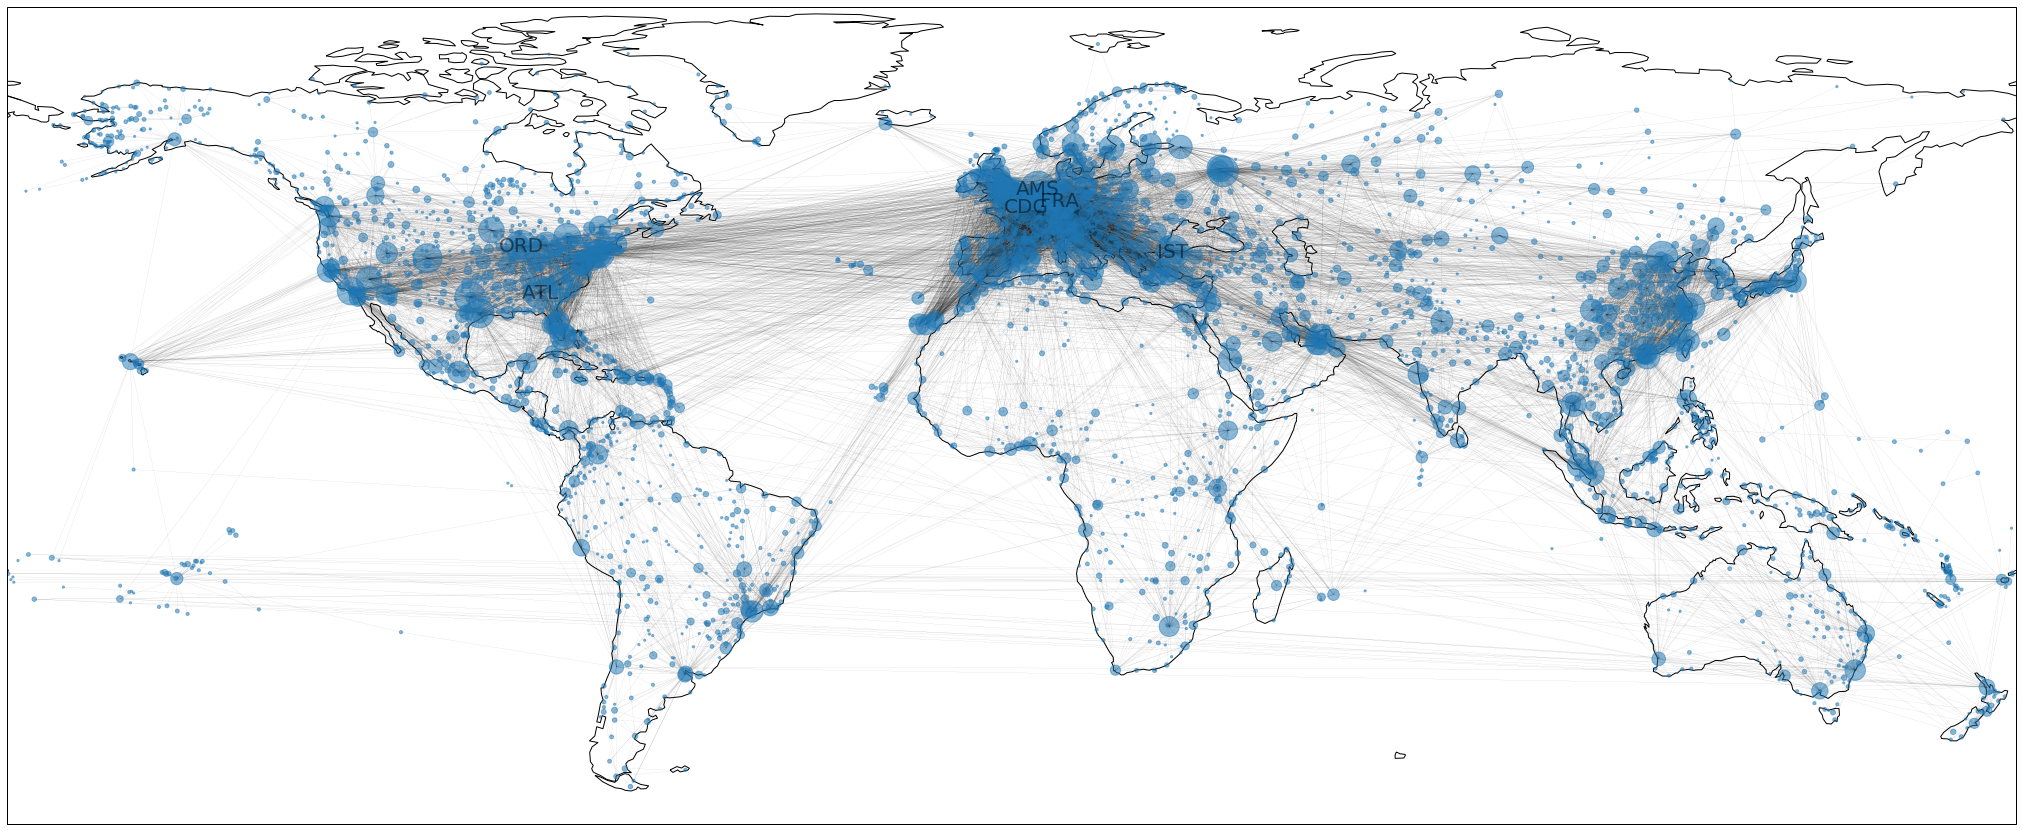

In [5]:
utils.display_map(flight_graph, pos)

Our second graph is going to be a road network constructed from [Open Street Map](https://en.wikipedia.org/wiki/OpenStreetMap) data, made possible thanks to the [`OSMnx`](https://osmnx.readthedocs.io/en/stable/index.html) Python package.

The cell code below will load a road graph whose nodes represent intersections and whose edges represent roads. We set it up so that the actual loaded graph covers roads within a 1 km radius of a point within EPFL.

In [6]:
point = (46.961652, 7.447015)  # EPFL
road_graph = ox.graph_from_point(point, distance=1000)

# It's possible to query by city name as well. Note, however, that the graph will be larger.
#places = dict(city='Lausanne')
#road_graph = ox.graph_from_place(places, network_type='drive')

road_graph = road_graph.to_undirected() # Work with its undirected version for convenience

The `osmnx` package also allows us to plot the graph using cartographic coordinates, as well as drawing the edges atop the actual roads.

Run the cell below to see such a drawing of the graph we have just loaded. Can you identify where are we in the plot?

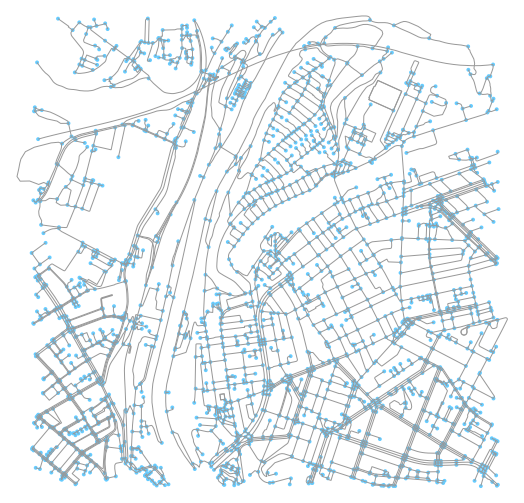

In [7]:
ox.plot_graph(road_graph, fig_height=9)
plt.show()

## 2.1. Degree distribution

The first thing we will examine is the degree distribution of the graphs we have loaded. That is, we want to compute and plot the histogram of the degree vectors of the networks above and compare their shapes. Try to mark as well on the histogram plot where the average degree is located. *Hints:* 1) Because both networks are represented as `networkx` graphs, you can access their degree vector via the `.degree()` function. 2) The [`collections`](https://docs.python.org/2/library/collections.html) module has a `Counter` function to help construct the histogram.

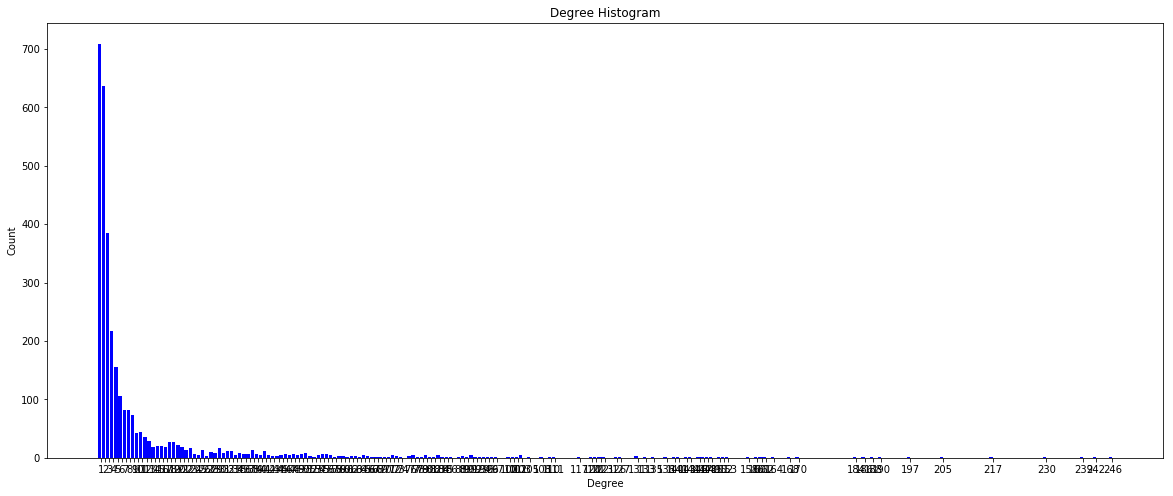

In [21]:
degree_sequence = sorted([d for n, d in flight_graph.degree()], reverse=True)  # degree sequence

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(20,8))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
#plt.axes([0.4, 0.4, 0.5, 0.5])
#Gcc = sorted(nx.connected_component_subgraphs(flight_graph), key=len, reverse=True)[0]
#pos = nx.spring_layout(flight_graph)
#plt.axis('off')
#nx.draw_networkx_nodes(flight_graph, pos, node_size=20)
#nx.draw_networkx_edges(flight_graph, pos, alpha=0.4)

plt.show()

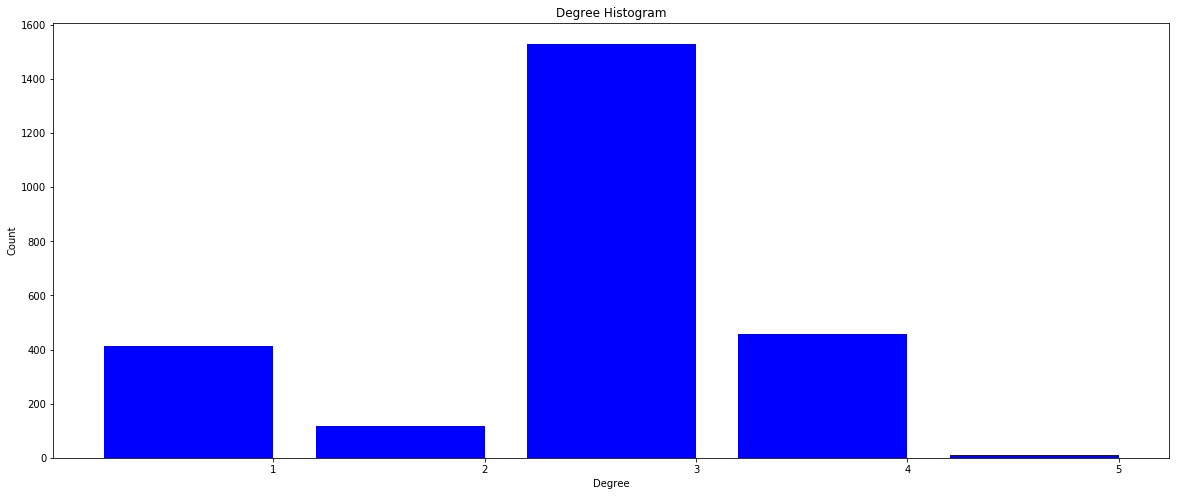

In [22]:
# Plot of the degree distribution of the Road graph
degree_sequence = sorted([d for n, d in road_graph.degree()], reverse=True)  # degree sequence

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(20,8))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

## 2.2. Sparsity

When we speak of the sparsity of a graph, we mean the number of edges that it has, in comparison to the number of edges that a complete (dense) graph with the same number of nodes would have.

Compute and print in the cell below the following quantities, for both the flight and road graphs:

- Actual number of edges.
- Maximum number of edges for a graph with the same number of nodes.
- The ratio between the two previous quantities.

After examining the numbers, can you say that the graphs we have here are sparse?

In [49]:
graphs = [road_graph, flight_graph]
names = ['road','flight']

import math
for g, n in zip(graphs, names):
    print('Length: %s (%s), Ratio: %0.23f' % (len(g.edges), n, (len(g.edges) / (len(g.nodes) * ((len(g.nodes)-1)/2)))))

Length: 3564 (road), Ratio: 0.00111315341933932278676
Length: 18617 (flight), Ratio: 0.00368549030957762268484


In [29]:
nx.to_numpy_matrix(flight_graph)

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
sparse_matrix = nx.to_scipy_sparse_matrix(flight_graph)

In order to visualize the sparsity pattern of both graphs, we ask you to plot the respective adjacency matrices in the cell below. *Hint:* the function [`matplotlib.pyplot.spy`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.spy.html) might be useful here.

## 2.3. Connectedness

Print the number of connected components for each graph. *Hint:* you can use `networkx` functions.

In [82]:
for g, n in zip(graphs, names):
    print('%s: %s' % (n, nx.number_connected_components(g)))

road: 1
flight: 7


If any of those graphs has more than 1 connected component, use the cell below to restrict this graph to its **largest** such component.

In [83]:
for c in nx.connected_components(flight_graph):
    print(len(c))

3154
2
3
2
4
4
10


In [84]:
sub_graphs = list(nx.connected_component_subgraphs(flight_graph))

Then, use the next cell to plot the graph. Compare this with the original plots. Can you identify which parts of the original graph stayed and which were removed?

/srv/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


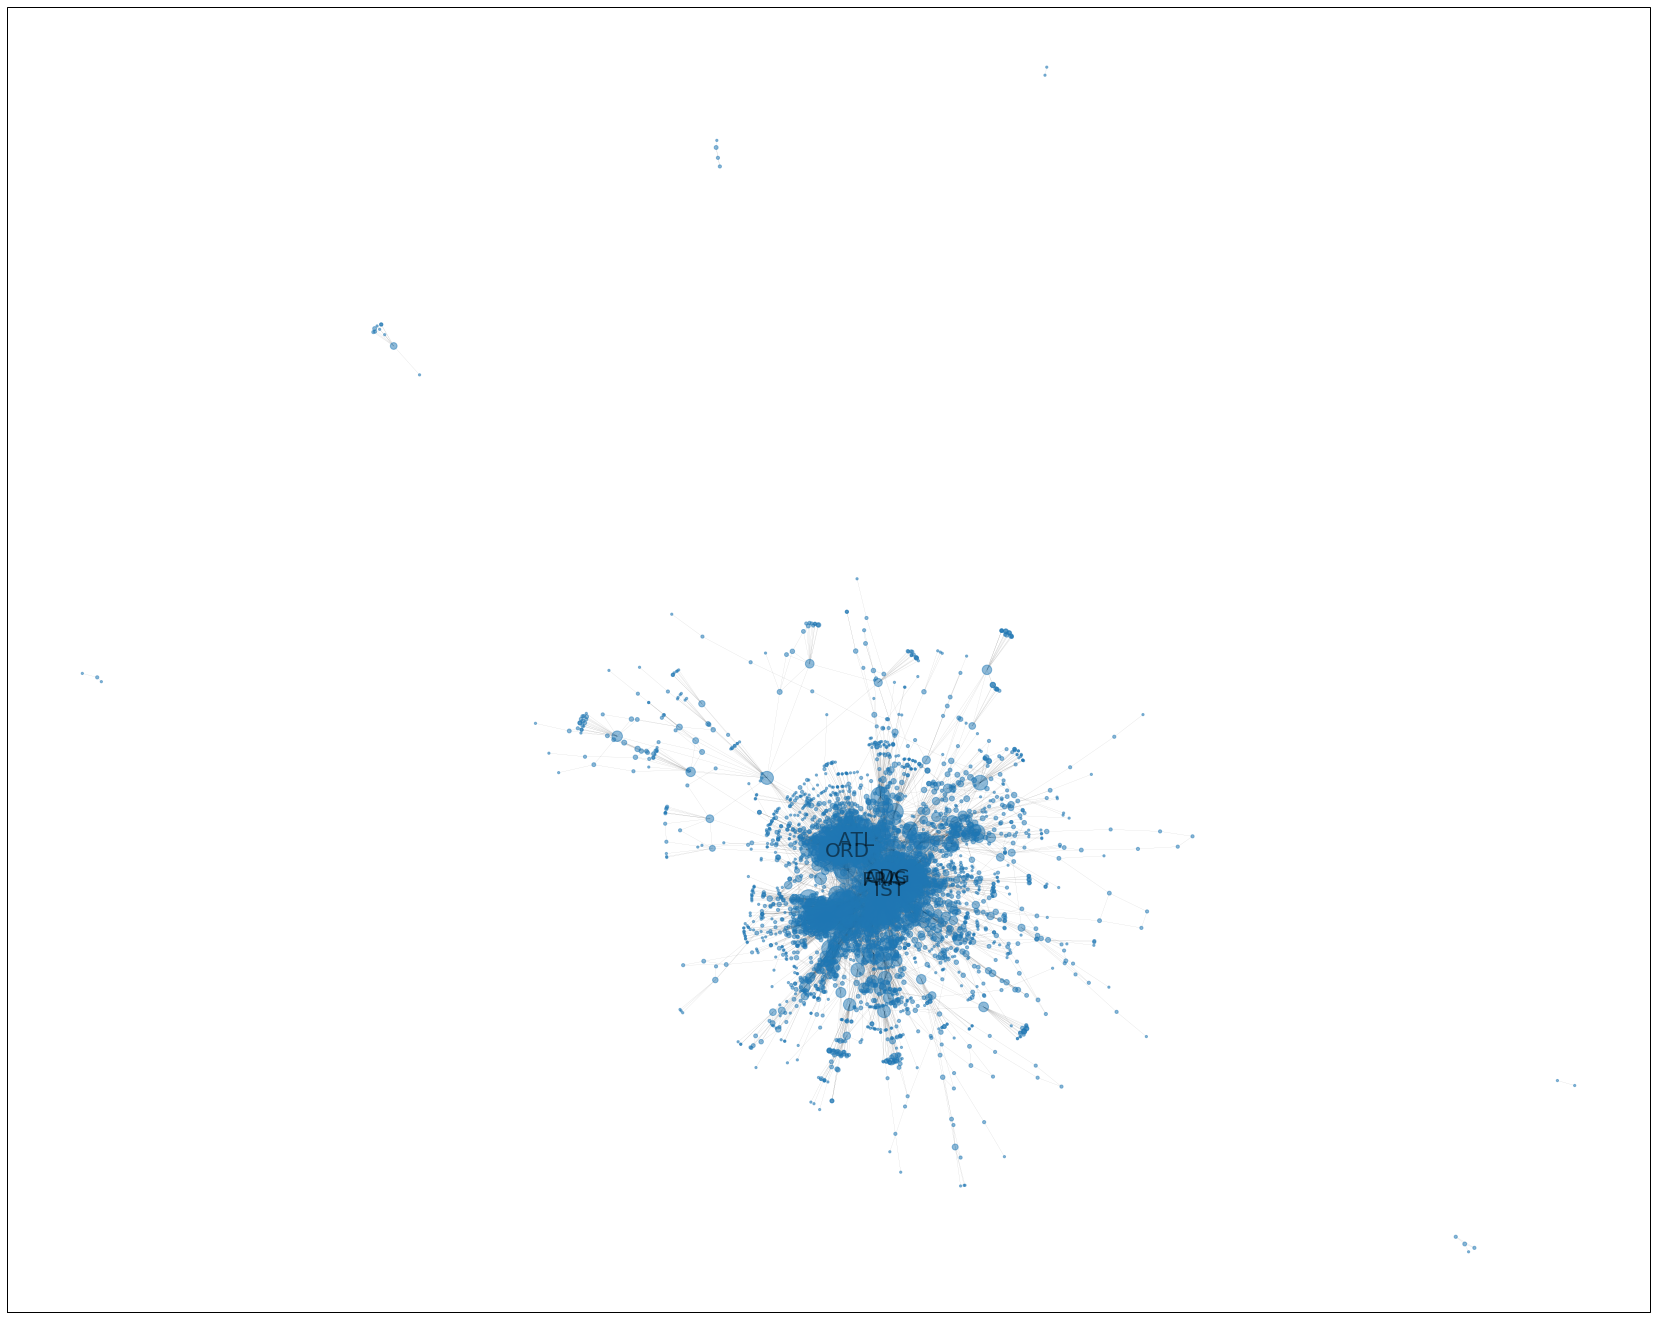

In [85]:
utils.display_map(flight_graph, pos)

/srv/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


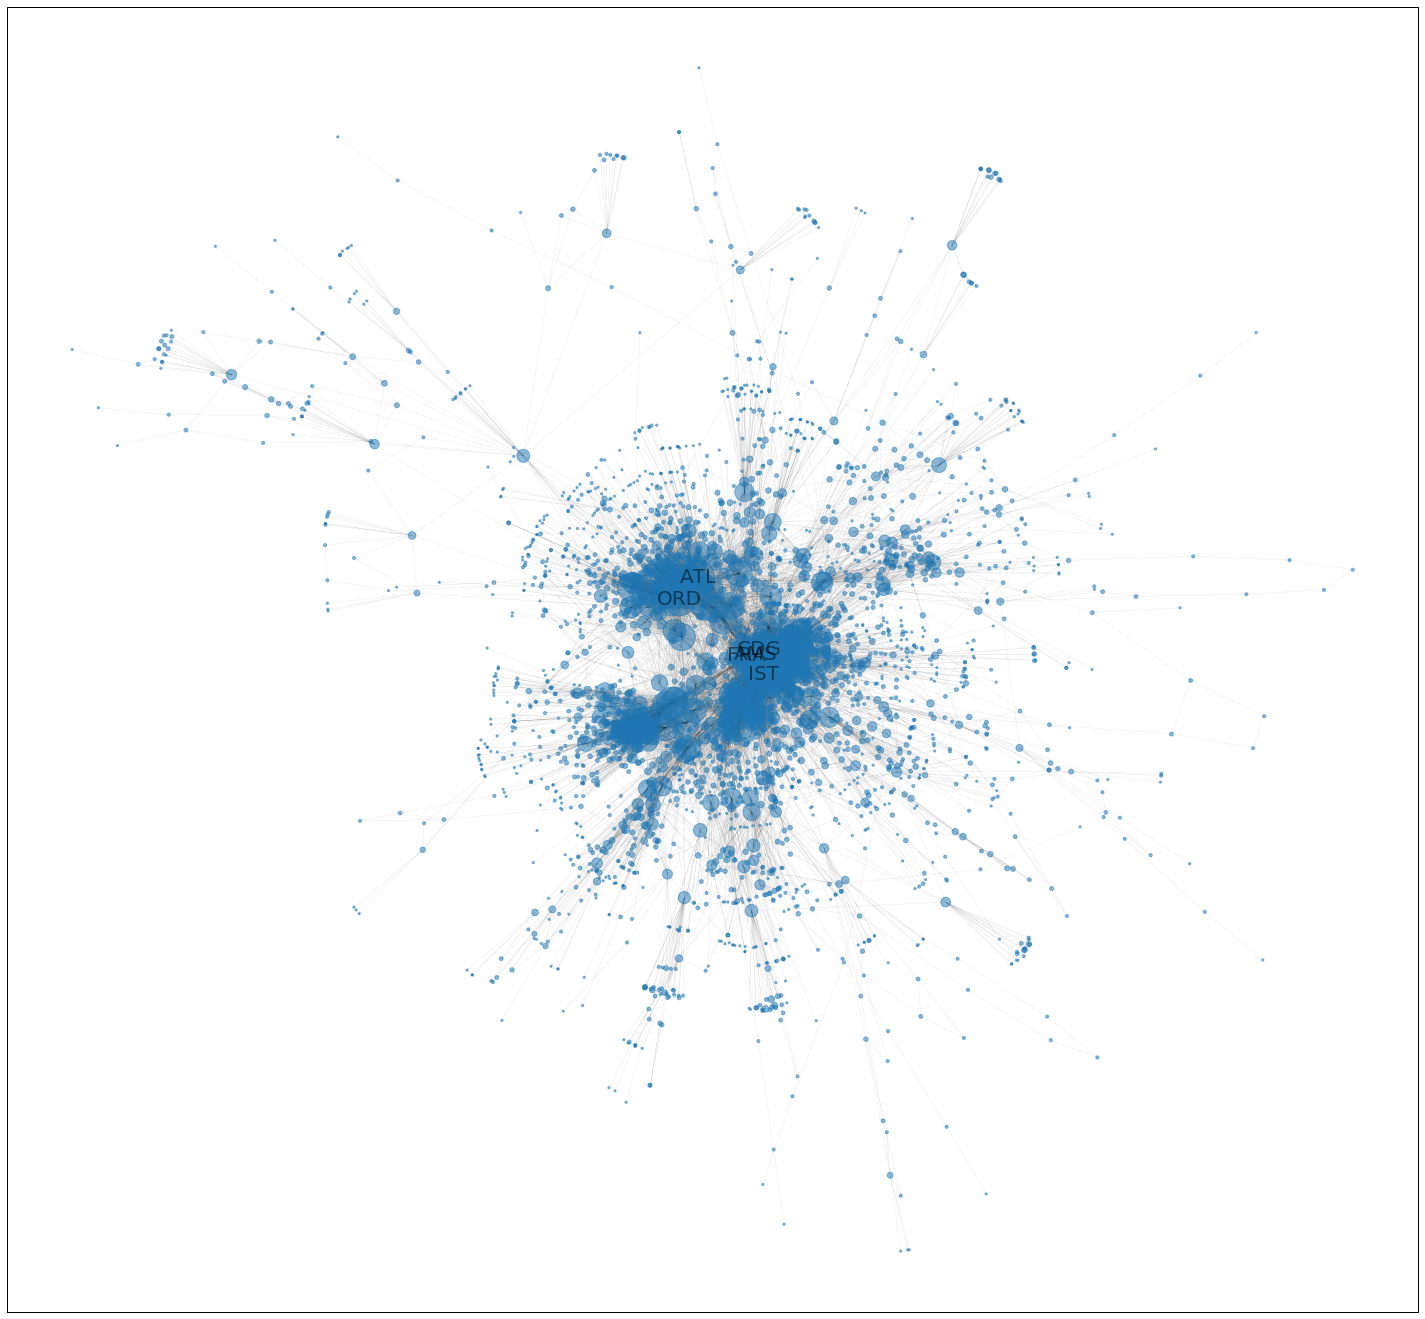

In [88]:
utils.display_map(sub_graphs[0], pos)

## 2.4. Shortest paths

Note that functions depending on polling shortest paths may take a while to compute.

### 2.4.1 Diameter

Recall that the diameter of the graph is the length of the shortest path between any pair of nodes. Use the cell below to print the diameter of the Flight and Road graphs.  *Hint:* you can use `networkx` functions. 

In [90]:
for g in [sub_graphs[0], road_graph]:
    print(nx.diameter(g))

12
83


### 2.4.2. Average shortest path length

Compute and print below the average shortest path lengths of both graphs. How do those quantities compare with the respective diameters? What does this say about the graphs themselves?

In [92]:
for g, n in zip([road_graph, sub_graphs[0]], names):
    print('Average shortest path length: %s, (%s)' % (nx.average_shortest_path_length(g), n))

Average shortest path length: 32.045291663998825, (road)
Average shortest path length: 3.9608958142148443, (flight)


### 2.4.3. Betweenness centrality

In the cell below, compute the betweenness centralities of the nodes in the Flight graph. Remember that betweenness centrality is a measure of the fraction of shortest paths that pass though the given node. *Hint:* you can use `networkx` functions. 

Find the node with largest betweenness centrality and check its corresponding airport acronym. Does it make sense? *Hint:* you can sort the values of the `betweenness` dictionary to find the key corresponding to the largest value. 

## 2.6. Clustering coefficient

The clustering coefficient of each node $i$ is a measure of the fraction of neighbors of $i$ that are also connected themselves. In this last subsection we will ask you to compute the average clustering coefficient of the networks under study. But first, in case you intend to use the `networkx` implementation of the average clustering coefficient, we suggest using the following `road_graph_simple` graph as a representation of the road graph. This line of code is simply a trick to "flatten" the information content on the edges of the graph so that the average clustering coefficient can be computed by the `networkx` implementation.

In [ ]:
road_graph_simple = nx.Graph(road_graph) # MultiGraph to Graph

Compute and print the average clustering coefficient of the Flight and Road networks in the cell below.